In [1]:
 !pip install sentence-transformers transformers scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Full Implementation

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-p

Named Entities Extracted from Survey Data:
                                            Sentence        Entity Label
0  I appreciate the leadership of Sarah Connor in...  Sarah Connor   PER
1  Working with John Smith in the Engineering tea...    John Smith   PER
2  Thanks to the efforts of Emily Davis, our team...   Emily Davis   PER
3  I feel the management in the Marketing departm...  Sarah Connor   PER
4  John Smith needs to improve his communication ...    John Smith   PER
5  Emily Davis has been an outstanding team playe...   Emily Davis   PER
6  The leadership of Sarah Connor in the Marketin...  Sarah Connor   PER
7  Communication within the Engineering team, esp...    John Smith   PER
8  Emily Davis's efforts have greatly contributed...   Emily Davis   PER

Themes for Sarah Connor:
  Leadership:
    Positive mentions: 3
    Negative mentions: 0
  Communication:
    Positive mentions: 0
    Negative mentions: 0
  Facilities:
    Positive mentions: 0
    Negative mentions: 0

Theme

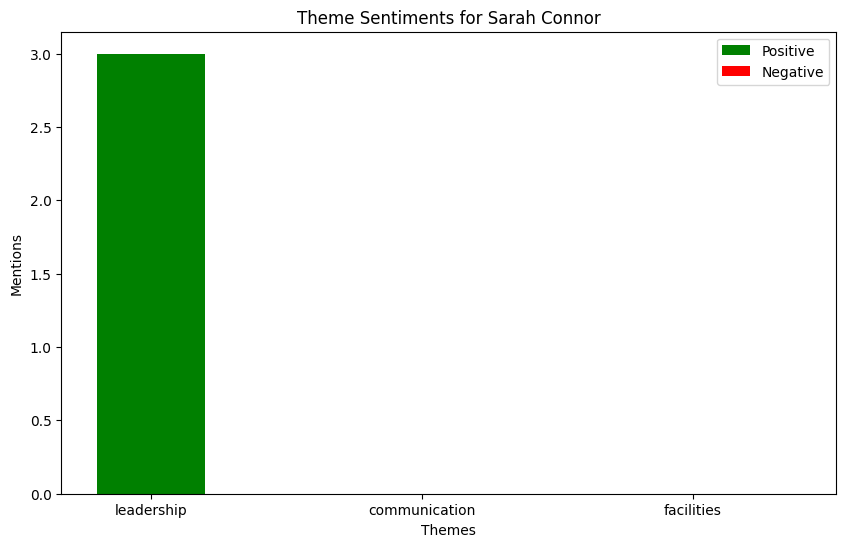

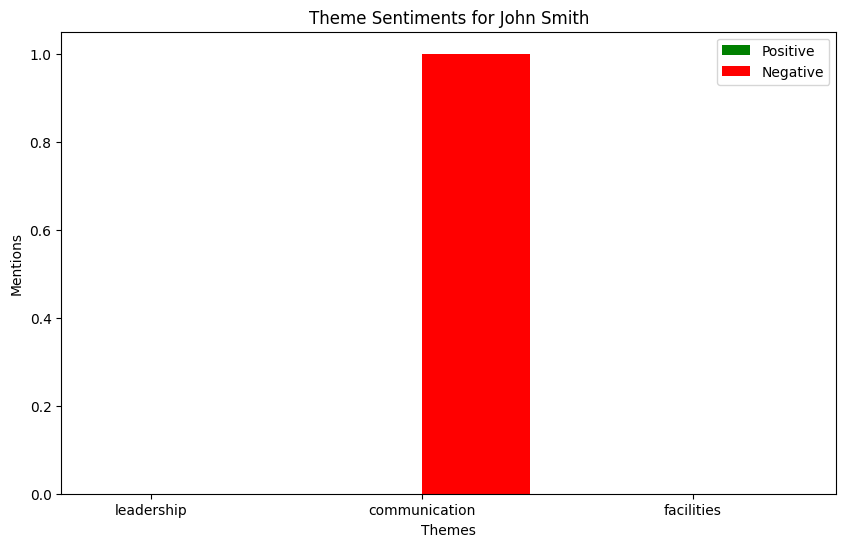

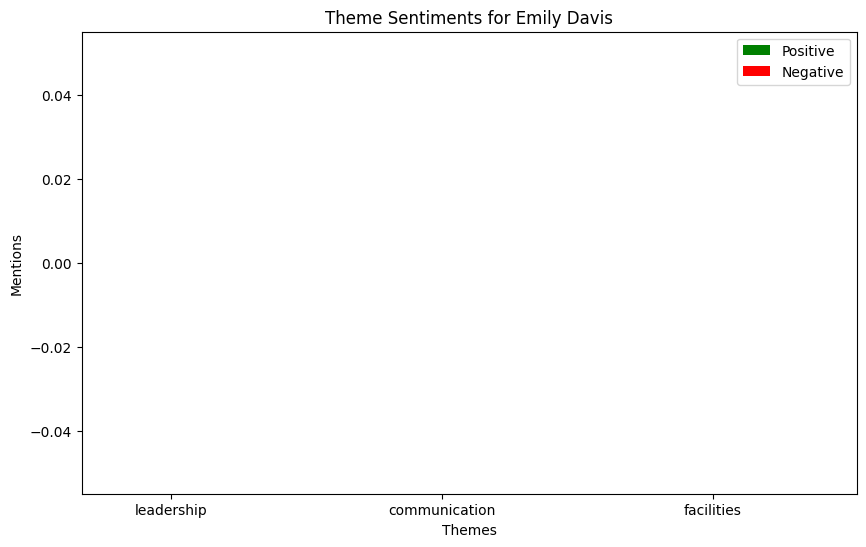

In [4]:
# Install necessary libraries first
# !pip install transformers scikit-learn pandas

# Step 1: Simulated Survey Data
survey_data = [
    "I appreciate the leadership of Sarah Connor in the Marketing department. She is very supportive.",
    "The New York office needs better facilities, especially in the cafeteria.",
    "Working with John Smith in the Engineering team has been a challenging experience. Communication could be improved.",
    "The HR policies at our San Francisco office are outdated and need a review.",
    "Thanks to the efforts of Emily Davis, our team in London has achieved great results.",
    "I feel the management in the Marketing department is top-notch. Sarah Connor is a great leader.",
    "The cafeteria in the New York office needs more variety in food options.",
    "John Smith needs to improve his communication skills. The Engineering team is struggling.",
    "Emily Davis has been an outstanding team player in London. Her efforts are highly appreciated.",
    "HR policies in the San Francisco office need to be updated to reflect current standards.",
    "The leadership of Sarah Connor in the Marketing department is commendable.",
    "The facilities in the New York office need to be upgraded. The cafeteria is outdated.",
    "Communication within the Engineering team, especially from John Smith, needs significant improvement.",
    "Emily Davis's efforts have greatly contributed to the success of our London team."
]

# Step 1: Named Entity Recognition (NER)
from transformers import pipeline
import pandas as pd

# Initialize NER pipeline
ner_pipeline = pipeline("ner", grouped_entities=True)

# Perform NER on the survey data
ner_results = [ner_pipeline(response) for response in survey_data]

# Extract named entities
named_entities = []
for response, ner_result in zip(survey_data, ner_results):
    for entity in ner_result:
        if entity['entity_group'] == 'PER':
            named_entities.append({
                "Sentence": response,
                "Entity": entity['word'],
                "Label": entity['entity_group']
            })

# Convert to DataFrame for better visualization
ner_df = pd.DataFrame(named_entities)
print("Named Entities Extracted from Survey Data:")
print(ner_df)

# Step 2: Analyze Sentiments Specific to Each Person and Map to Themes
# Initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Define themes
themes = {
    "leadership": ["leadership", "leader", "management"],
    "communication": ["communication", "communicate", "talk"],
    "facilities": ["facilities", "cafeteria", "office"]
}

# Function to analyze sentiment for a specific person and map to themes
def person_sentiment_analysis(person_name, survey_data, sentiment_pipeline, themes):
    theme_sentiments = {theme: {'positive': 0, 'negative': 0} for theme in themes}

    for response in survey_data:
        if person_name in response:
            sentiment = sentiment_pipeline(response)[0]
            for theme, keywords in themes.items():
                if any(keyword in response for keyword in keywords):
                    if sentiment['label'] == 'POSITIVE':
                        theme_sentiments[theme]['positive'] += 1
                    elif sentiment['label'] == 'NEGATIVE':
                        theme_sentiments[theme]['negative'] += 1

    return theme_sentiments

# Identify unique persons
unique_persons = ner_df['Entity'].unique()

# Analyze sentiments for each person and map to themes
person_theme_sentiments = {person: person_sentiment_analysis(person, survey_data, sentiment_pipeline, themes) for person in unique_persons}

# Display the results
for person, sentiments in person_theme_sentiments.items():
    print(f"\nThemes for {person}:")
    for theme, sentiment_counts in sentiments.items():
        print(f"  {theme.capitalize()}:")
        print(f"    Positive mentions: {sentiment_counts['positive']}")
        print(f"    Negative mentions: {sentiment_counts['negative']}")


# Step 3: Create Visualizations
import matplotlib.pyplot as plt

# Function to create bar chart for a person's themes
def plot_person_themes(person, theme_sentiments):
    themes = list(theme_sentiments.keys())
    positives = [theme_sentiments[theme]['positive'] for theme in themes]
    negatives = [theme_sentiments[theme]['negative'] for theme in themes]

    x = range(len(themes))

    plt.figure(figsize=(10, 6))
    plt.bar(x, positives, width=0.4, label='Positive', color='green', align='center')
    plt.bar(x, negatives, width=0.4, label='Negative', color='red', align='edge')
    plt.xlabel('Themes')
    plt.ylabel('Mentions')
    plt.title(f'Theme Sentiments for {person}')
    plt.xticks(x, themes)
    plt.legend()
    plt.show()

# Plot themes for each person
for person, sentiments in person_theme_sentiments.items():
    plot_person_themes(person, sentiments)


## Topic Modelling

Identified Topics:
Topic 1: team, office, davis, efforts, emily, london, new, york, cafeteria, needs
Topic 2: engineering, communication, smith, john, team, need, outdated, office, needs, especially
Topic 3: connor, department, sarah, marketing, leadership, great, notch, management, feel, leader


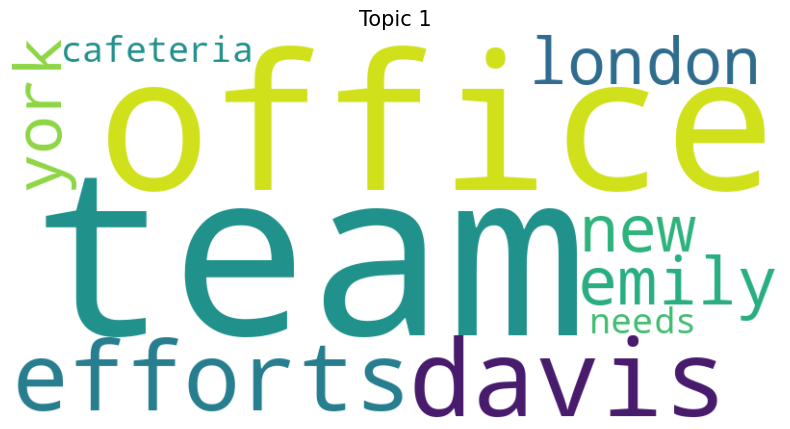

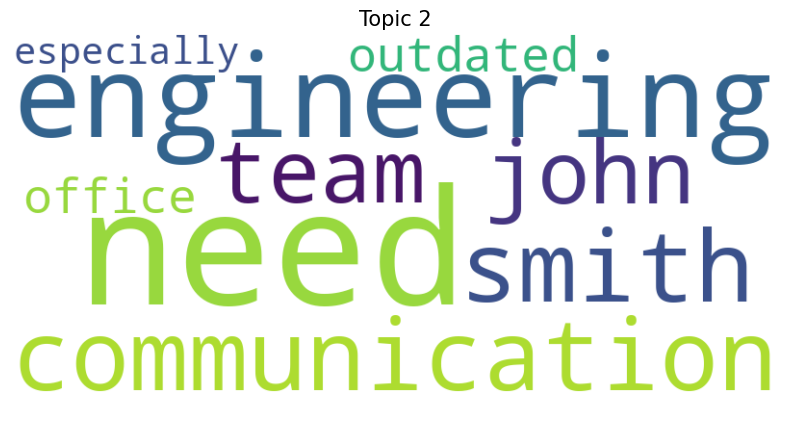

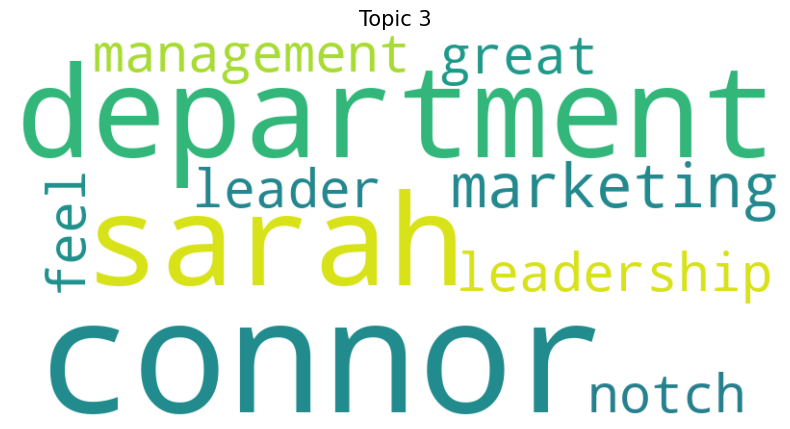

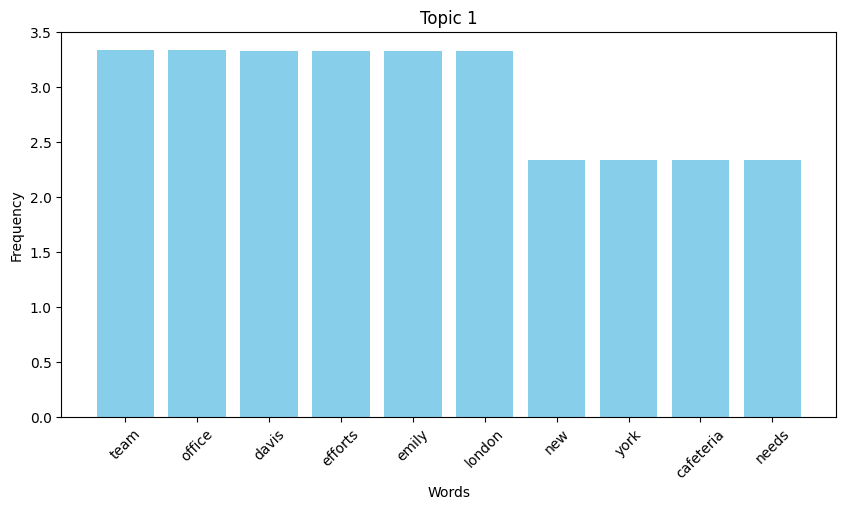

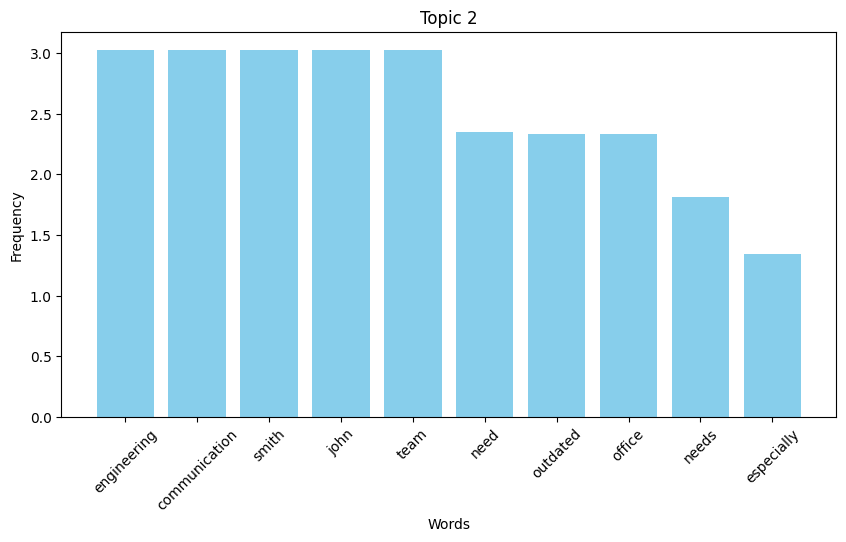

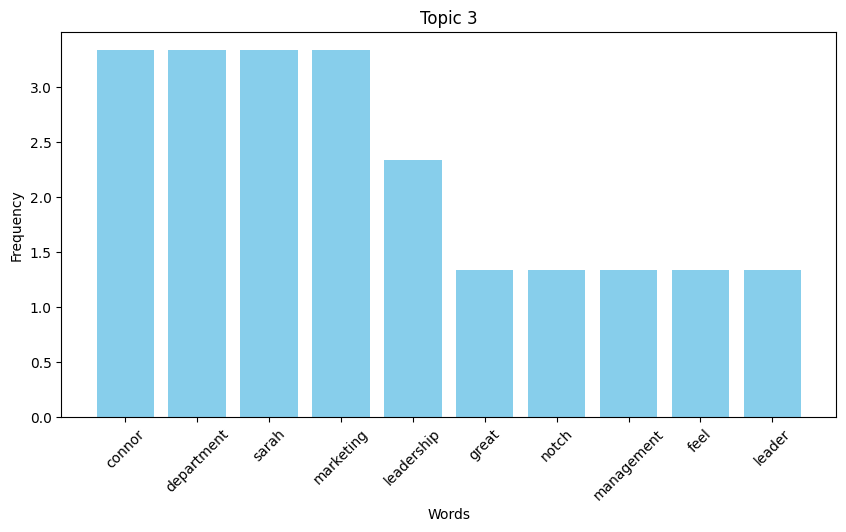

In [5]:
# Install necessary libraries first
# !pip install scikit-learn wordcloud matplotlib pandas

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Simulated survey data
survey_data = [
    "I appreciate the leadership of Sarah Connor in the Marketing department. She is very supportive.",
    "The New York office needs better facilities, especially in the cafeteria.",
    "Working with John Smith in the Engineering team has been a challenging experience. Communication could be improved.",
    "The HR policies at our San Francisco office are outdated and need a review.",
    "Thanks to the efforts of Emily Davis, our team in London has achieved great results.",
    "I feel the management in the Marketing department is top-notch. Sarah Connor is a great leader.",
    "The cafeteria in the New York office needs more variety in food options.",
    "John Smith needs to improve his communication skills. The Engineering team is struggling.",
    "Emily Davis has been an outstanding team player in London. Her efforts are highly appreciated.",
    "HR policies in the San Francisco office need to be updated to reflect current standards.",
    "The leadership of Sarah Connor in the Marketing department is commendable.",
    "The facilities in the New York office need to be upgraded. The cafeteria is outdated.",
    "Communication within the Engineering team, especially from John Smith, needs significant improvement.",
    "Emily Davis's efforts have greatly contributed to the success of our London team."
]

# Step 1: Vectorize the Survey Data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(survey_data)

# Step 2: Fit the LDA Model
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda.fit(X)

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Step 3: Extract and Visualize Topics
# Function to display topics
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

topics = display_topics(lda, feature_names, 10)
print("Identified Topics:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

# Function to plot word cloud for a topic
def plot_word_cloud(topic_words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# Plot word clouds for each topic
for topic, words in topics.items():
    plot_word_cloud(words, topic)

# Function to plot bar chart for topic words
def plot_topic_bar_chart(topic_words, title):
    word_freq = {word: lda.components_[int(title.split()[-1]) - 1][feature_names.tolist().index(word)] for word in topic_words}
    plt.figure(figsize=(10, 5))
    plt.bar(word_freq.keys(), word_freq.values(), color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot bar charts for each topic
for topic, words in topics.items():
    plot_topic_bar_chart(words, topic)
